<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam

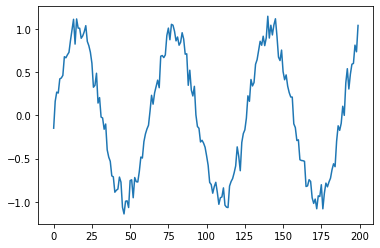

In [160]:
#Synthetic data
series = np.sin(0.1*np.arange(200)) +  np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [161]:
T=10
X=[]
Y=[]

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print("X.shape:", X.shape, "Y.shape", Y.shape)

X.shape: (190, 10) Y.shape (190,)


In [162]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)
model.compile(loss='mse', optimizer = Adam(lr=0.1))

r= model.fit(X[:N//2], Y[:N//2], epochs=50, validation_data= (X[N//2:], Y[N//2:]))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
3/3 [==============================] - 0s 50ms/step - loss: 1.4473 - val_loss: 1.1685
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 1.0223 - val_loss: 0.6534
Epoch 3/50
3/3 [==============================] - 0s 13ms/step - loss: 0.4662 - val_loss: 0.3366
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 0.2870 - val_loss: 0.1362
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0787 - val_loss: 0.0492
Epoch 6/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0578 - val_loss: 0.0717
Epoch 7/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0641 - val_loss: 0.0720
Epoch 8/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0760 - val_loss: 0.1357
Epoch 9/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0948 - val_loss: 0.0934
Epoch 10/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0720 - val_loss: 0.0785
Epoch 11/50
3/3 [============

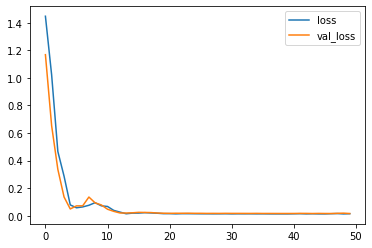

In [163]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [164]:
validation_target = Y[N//2:]
validation_predictions = []

last_x = X[N//2]  #1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1x1 array scalar

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

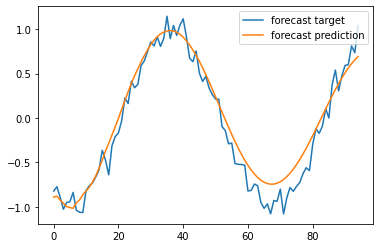

In [165]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()